In [ ]:
!pip install ipympl

In [1]:
%matplotlib notebook
#%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [115]:
with open('../ranking/log.txt') as pfile:
    plines = pfile.readlines()
    
    algs = ["CodeForces", "EloR", "Topcoder", "TrueSkill"]
    mapping = {"CodeforcesSystem": 0, "EloRSystem": 1, "TopCoderSystem": 2, "TrueSkillSPBSystem": 3}
    
    acc = [{}, {}, {}, {}]
    pct = [{}, {}, {}, {}]
    crsent = [{}, {}, {}, {}] 
    time = [{}, {}, {}, {}]
    
    for line in plines:
        try:
            tokens = line.split(' ')
            name = tokens[0]
            rest = ' '.join(tokens[1:])
            
            tokens = rest.split(':')
            params, results = ":".join(tokens[:-1]), tokens[-1]
            def extract_numbers(line):
                import re
                res = re.findall(r'[^0-9](\d+\.*\d*)[^0-9]', line)
                return [float(x) for x in res]

            key = tuple(extract_numbers(params))
            vals = extract_numbers(results)[1:]
            if len(key) == 0 or len(vals) == 0:
                continue
            
            alg_id = mapping[name]
            acc[alg_id][key] = vals[0]
            pct[alg_id][key] = vals[1]
            crsent[alg_id][key] = vals[2]
            time[alg_id][key] = vals[3]
        except:
            pass

In [116]:
for i in range(len(algs)):
    print('Algorithm type {}:\n \tBest accuracy: {}\n\tAverage percentile deviation: {}\n\tCross entropy: {}'.format(algs[i], max(acc[i].values()), min(pct[i].values()), min(crsent[i].values())))

Algorithm type CodeForces:
 	Best accuracy: 88.88049273763556
	Average percentile deviation: 7.800277551020409
	Cross entropy: 0.2787999717905185
Algorithm type EloR:
 	Best accuracy: 88.88736900165472
	Average percentile deviation: 7.790657142857141
	Cross entropy: 0.25268852309570544
Algorithm type Topcoder:
 	Best accuracy: 88.84479581622438
	Average percentile deviation: 7.817199999999999
	Cross entropy: 0.2724666276335326
Algorithm type TrueSkill:
 	Best accuracy: 87.58252946824376
	Average percentile deviation: 8.038171428571427
	Cross entropy: 0.6486318083072546


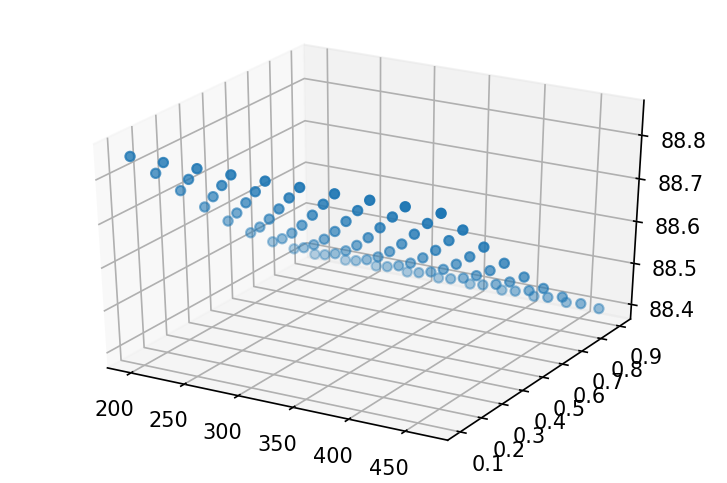

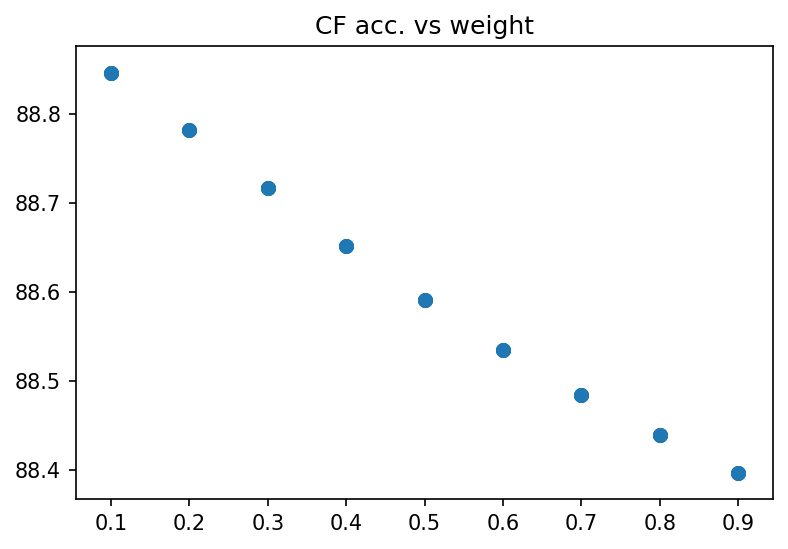

In [60]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Codeforces
############
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = zip(*list(acc[0].keys()))
z = list(acc[0].values())
ax.scatter(x, y, z)
plt.show()

# From the plot above, it seems like sig_perf has no effect on codeforces

plt.title("CF acc. vs weight")
plt.scatter(y, z)
plt.show()

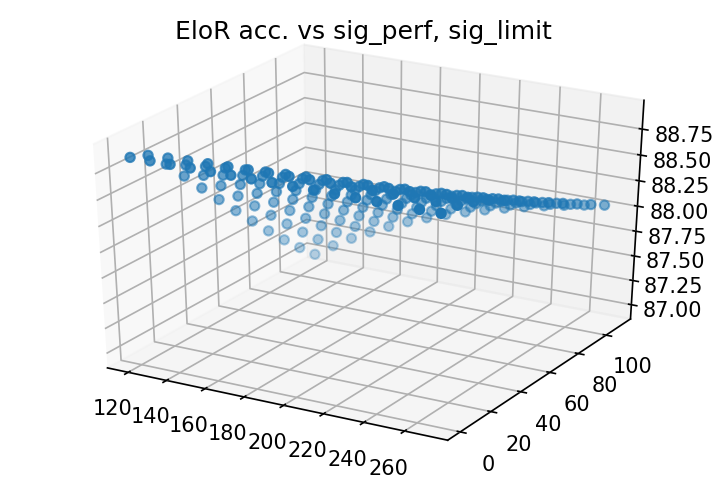

In [61]:
# EloR
######
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = zip(*list(acc[1].keys()))
z = list(acc[1].values())
ax.scatter(x, y, z)
ax.set_title("EloR acc. vs sig_perf, sig_limit")
plt.show()

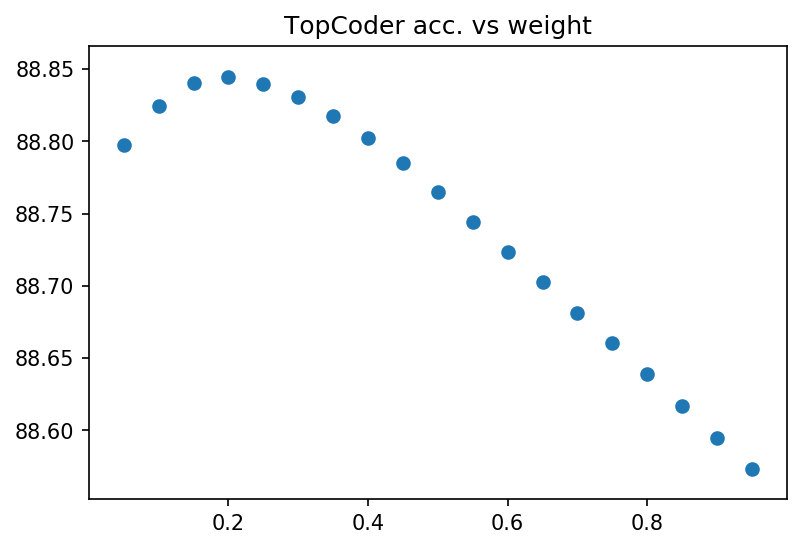

In [62]:
# TopCoder
##########
y = list(acc[2].keys())
z = list(acc[2].values())
plt.scatter(y, z)
plt.title("TopCoder acc. vs weight")
plt.show()

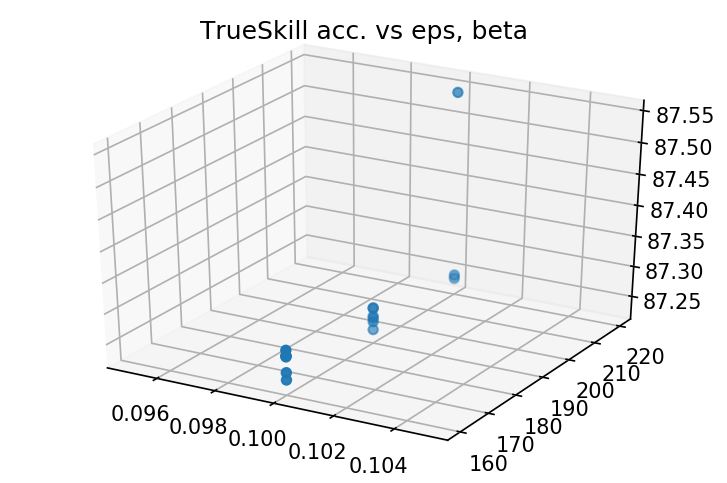

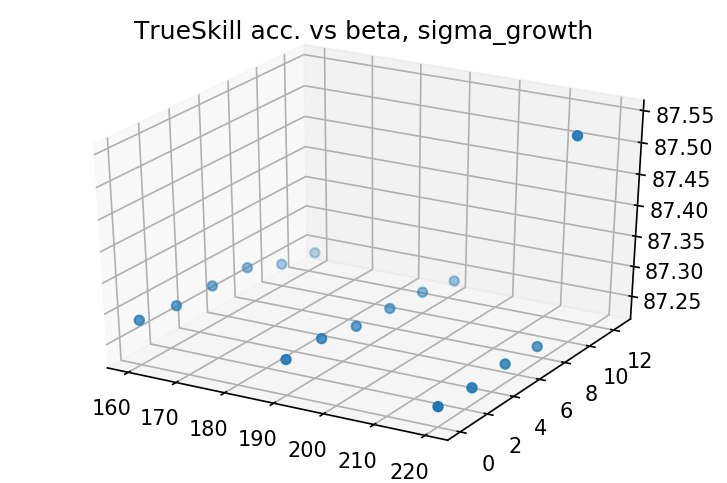

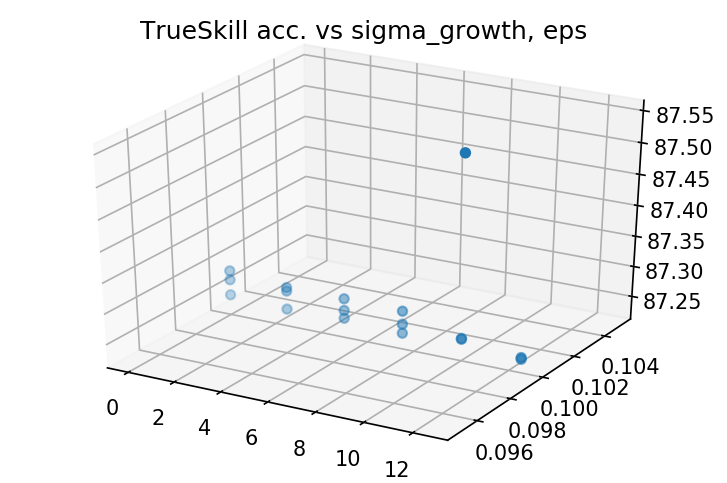

In [63]:
# TrueSkill
###########
eps, beta, sigma_growth = zip(*list(acc[3].keys()))
z = list(acc[3].values())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eps, beta, z)
ax.set_title("TrueSkill acc. vs eps, beta")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(beta, sigma_growth, z)
ax.set_title("TrueSkill acc. vs beta, sigma_growth")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sigma_growth, eps, z)
ax.set_title("TrueSkill acc. vs sigma_growth, eps")
plt.show()

# Seems fairly insensitive to sigma growth